In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src import Graph, cut_capacity, find_min_cut, maximum_density_subgraph

In [2]:
vertices = ["A", "B", "C", "D", "E", "F", "G"]
graph = Graph(vertices)
print(graph)

vertices : A B C D E F G 
edges : (('A', 'C'), 1) (('A', 'D'), 2) (('A', 'E'), 1) (('B', 'C'), 1) (('B', 'E'), 2) (('B', 'F'), 2) (('B', 'G'), 1) (('C', 'E'), 1) (('C', 'F'), 1) (('C', 'G'), 3) (('D', 'E'), 3) (('D', 'F'), 1) 


In [3]:
graph.adjacency_matrix

array([[0, 0, 1, 2, 1, 0, 0],
       [0, 0, 1, 0, 2, 2, 1],
       [1, 1, 0, 0, 1, 1, 3],
       [2, 0, 0, 0, 3, 1, 0],
       [1, 2, 1, 3, 0, 0, 0],
       [0, 2, 1, 1, 0, 0, 0],
       [0, 1, 3, 0, 0, 0, 0]])

In [4]:
round(graph.density, 2)

2.71

In [6]:
edges = [(i, j, {
    "weight": graph.adjacency_matrix[i, j]
}) for i in range(graph.n_vertices) for j in range(i)
         if graph.adjacency_matrix[i, j]]

net = nx.Graph()
net.add_edges_from(edges)

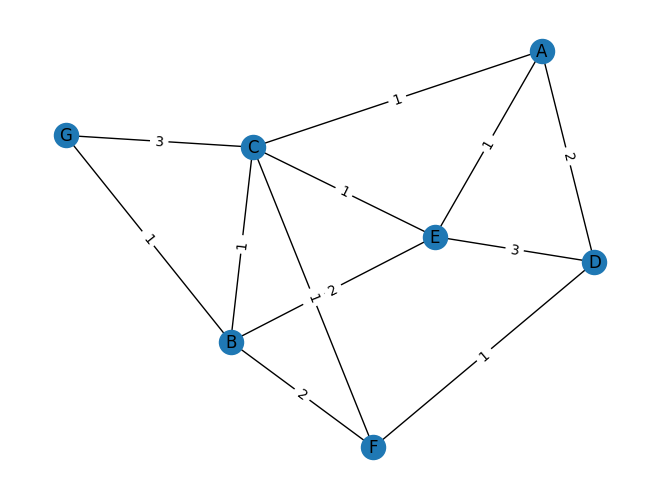

In [7]:
pos = nx.spring_layout(net)
nx.draw(net, pos, labels=dict(enumerate(graph.vertices)), with_labels=True)

weights = nx.get_edge_attributes(net, "weight")
nx.draw_networkx_edge_labels(net, pos, edge_labels=weights)

plt.show()

In [12]:
vertices, adjacency_matrix = maximum_density_subgraph(graph)
print("vertices :", vertices)
print("adjacency matrix :\n", adjacency_matrix)

vertices : ('A', 'D', 'E')
adjacency matrix :
 [[0 2 1]
 [2 0 3]
 [1 3 0]]
